In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [2]:
train = pd.read_csv('mer_train.csv')
print('Train shape: ', train.shape)

Train shape:  (4209, 378)


Too many features (colums) with not enough rows.

In [49]:
train.head(10)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
5,18,92.93,t,b,e,c,d,g,h,s,...,0,0,1,0,0,0,0,0,0,0
6,24,128.76,al,r,e,f,d,f,h,s,...,0,0,0,0,0,0,0,0,0,0
7,25,91.91,o,l,as,f,d,f,j,a,...,0,0,0,0,0,0,0,0,0,0
8,27,108.67,w,s,as,e,d,f,i,h,...,1,0,0,0,0,0,0,0,0,0
9,30,126.99,j,b,aq,c,d,f,a,e,...,0,0,1,0,0,0,0,0,0,0


### Target Feature

"y" is the time (in seconds) that the car took to pass testing for each variable. Let's see its distribution.

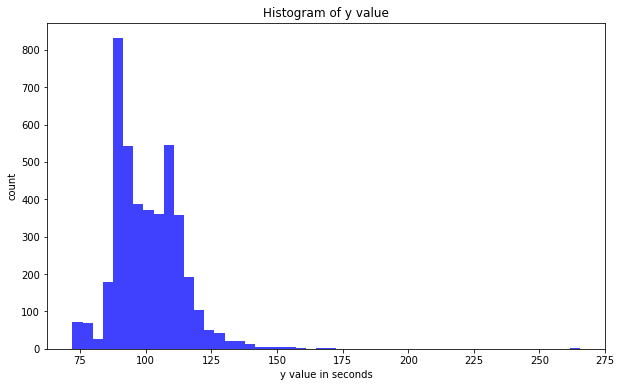

In [12]:
plt.figure(figsize = (10, 6))
n, bins, patches = plt.hist(train['y'], 50, facecolor='blue', alpha=0.75)
plt.xlabel('y value in seconds')
plt.ylabel('count')
plt.title('Histogram of y value')
plt.show();

In [3]:
train['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

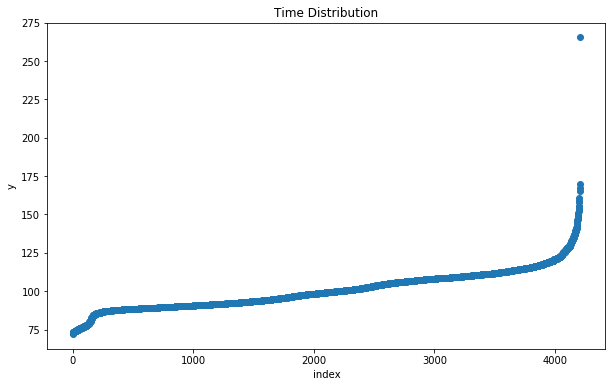

In [14]:
plt.figure(figsize = (10, 6))
plt.scatter(range(train.shape[0]), np.sort(train['y'].values))
plt.xlabel('index')
plt.ylabel('y')
plt.title("Time Distribution")
plt.show();

There is one outlier which was the max time at 265 seconds.

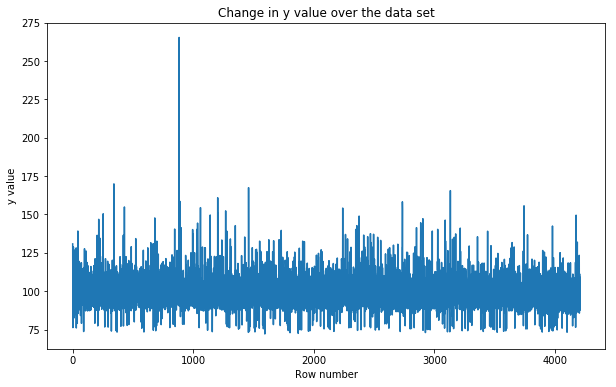

In [15]:
plt.figure(figsize=(10,6))
plt.plot(train['y'].values)
plt.xlabel('Row number')
plt.ylabel('y value')
plt.title('Change in y value over the data set')
plt.show();

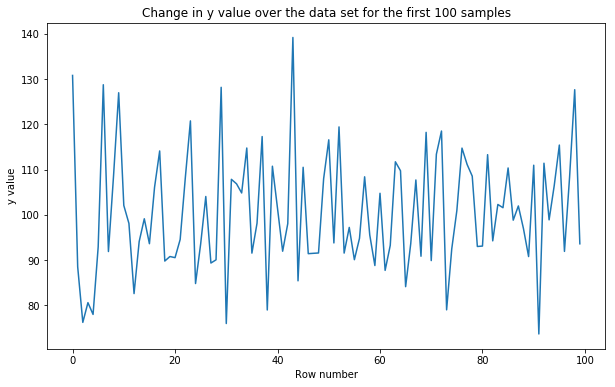

In [16]:
plt.figure(figsize=(10,6))
plt.plot(train['y'][:100].values)
plt.xlabel('Row number')
plt.ylabel('y value')
plt.title('Change in y value over the data set for the first 100 samples')
plt.show();

### Features Exploration

In [4]:
cols = [c for c in train.columns if 'X' in c]
print('Number of features except ID and target feature: {}'.format(len(cols)))
print('Feature types :')
train[cols].dtypes.value_counts()

Number of features except ID and target feature: 376
Feature types :


int64     368
object      8
dtype: int64

Out of all features, we are given 8 categorical features and 368 integer features. What about the cardinality of our features? The following ideas and scripts were from XXX.

In [5]:
counts = [[], [], []]
for c in cols:
    typ = train[c].dtypes
    uniq = len(train[c].unique())
    if uniq == 1:
        counts[0].append(c)
    elif uniq == 2 and typ == np.int64:
        counts[1].append(c)
    else:
        counts[2].append(c)
print('Constant features: {} Binary features: {} Categorical features: {}\n'.format(*[len(c) for c in counts]))
print('Constant features: ', counts[0])
print()
print('Categorical features: ', counts[2])

Constant features: 12 Binary features: 356 Categorical features: 8

Constant features:  ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']

Categorical features:  ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


Interestingly, we have 12 features which only have a single value (0) in them - these are pretty useless for supervised algorithms, and should probably be dropped (unless you want to use them for anomaly detection in case a different value appears in the test set). 

The rest of our dataset is made up of many binary features, and 8 categorical features. Let's explore categorical features first.

### Categorical Features

In [6]:
for cat in ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']:
    print("Number of levels in category '{0}': \b {1:2}".format(cat, train[cat].nunique()))

Number of levels in category 'X0':  47
Number of levels in category 'X1':  27
Number of levels in category 'X2':  44
Number of levels in category 'X3':   7
Number of levels in category 'X4':   4
Number of levels in category 'X5':  29
Number of levels in category 'X6':  12
Number of levels in category 'X8':  25


I am extremely interested in EDA, so, let's go ahead to explore every categorical feature.

#### Feature X0

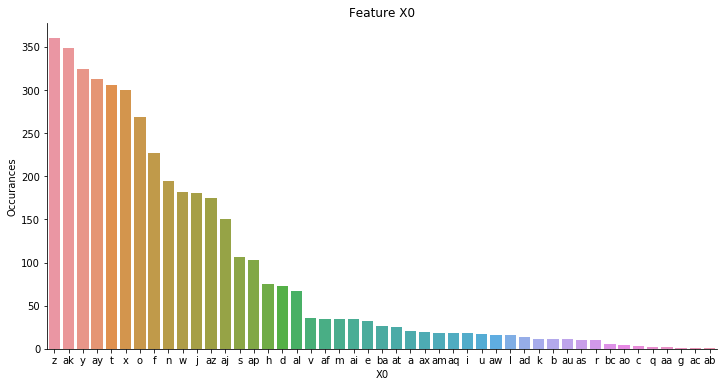

In [20]:
sort_X0 = train.groupby('X0').size()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize=(12,6))
sns.countplot(x='X0', data=train, order = sort_X0)
plt.xlabel('X0')
plt.ylabel('Occurances')
plt.title('Feature X0')
sns.despine();

#### X0 vs. target feature y

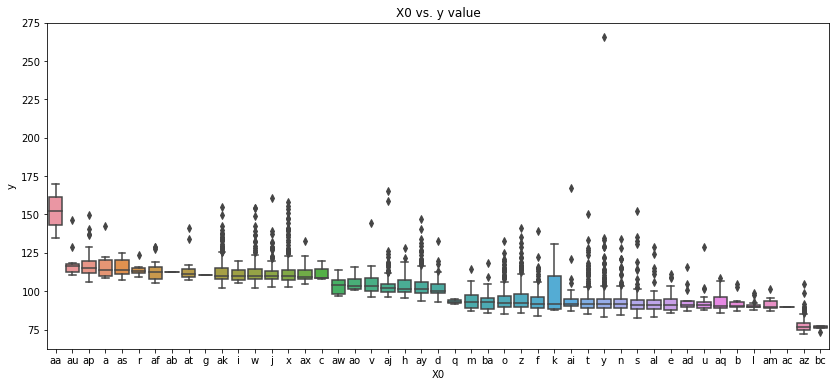

In [21]:
sort_y = train.groupby('X0')['y']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize = (14, 6))
sns.boxplot(y='y', x='X0', data=train, order=sort_y)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels())
plt.title('X0 vs. y value')
plt.show();

#### Feature X1

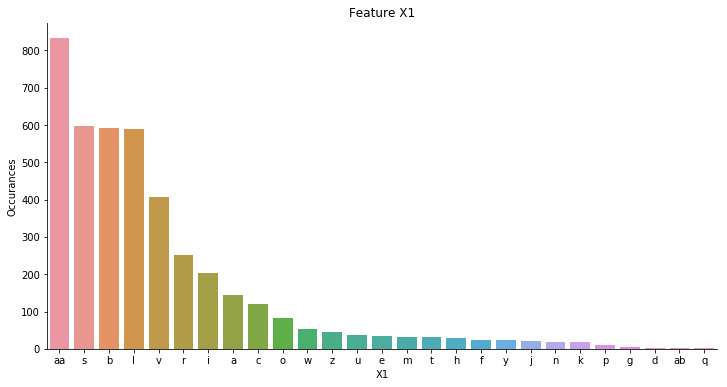

In [22]:
sort_X1 = train.groupby('X1').size()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize=(12,6))
sns.countplot(x='X1', data=train, order = sort_X1)
plt.xlabel('X1')
plt.ylabel('Occurances')
plt.title('Feature X1')
sns.despine();

#### X1 vs. target feature y

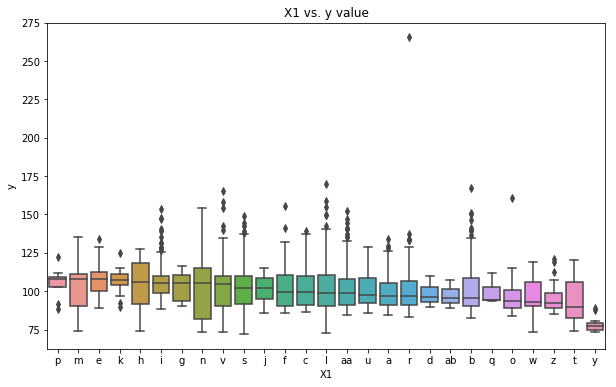

In [23]:
sort_y = train.groupby('X1')['y']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize = (10, 6))
sns.boxplot(y='y', x='X1', data=train, order=sort_y)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels())
plt.title('X1 vs. y value')
plt.show();

#### Feature X2

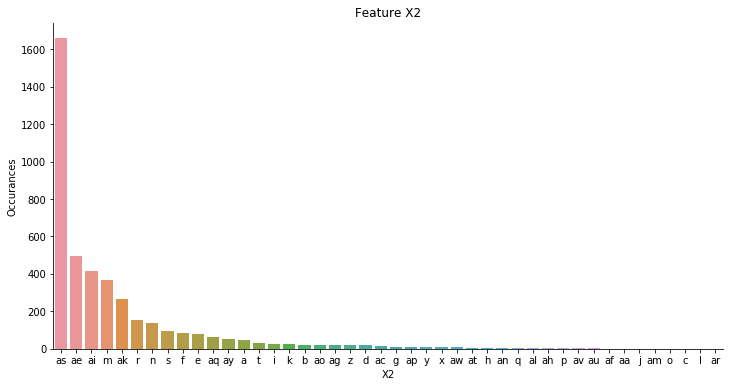

In [24]:
sort_X2 = train.groupby('X2').size()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize=(12,6))
sns.countplot(x='X2', data=train, order = sort_X2)
plt.xlabel('X2')
plt.ylabel('Occurances')
plt.title('Feature X2')
sns.despine();

#### X2 vs. target feature y

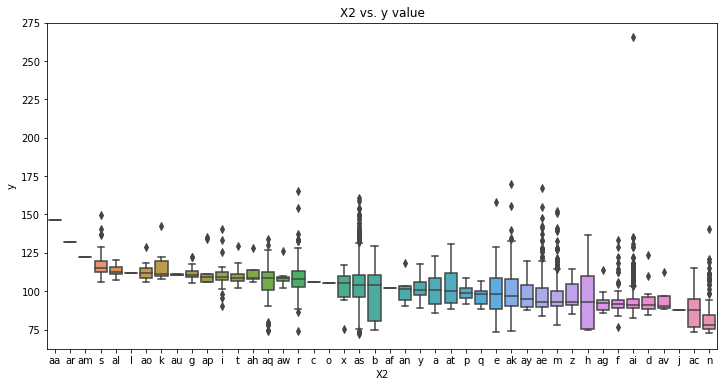

In [25]:
sort_y = train.groupby('X2')['y']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize = (12, 6))
sns.boxplot(y='y', x='X2', data=train, order=sort_y)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels())
plt.title('X2 vs. y value')
plt.show();

#### Feature X3

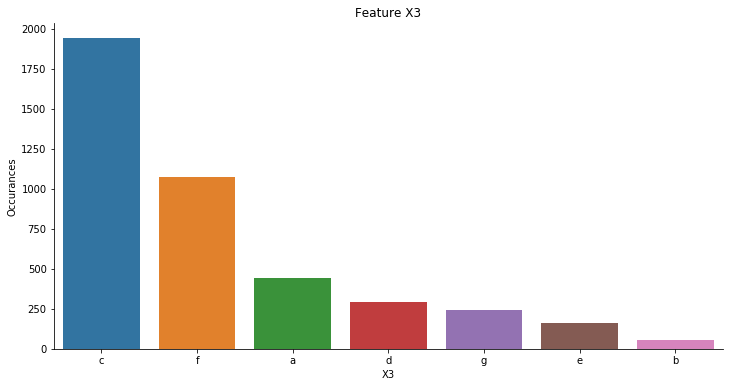

In [26]:
sort_X3 = train.groupby('X3').size()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize=(12,6))
sns.countplot(x='X3', data=train, order = sort_X3)
plt.xlabel('X3')
plt.ylabel('Occurances')
plt.title('Feature X3')
sns.despine();

#### X3 vs. target feature y

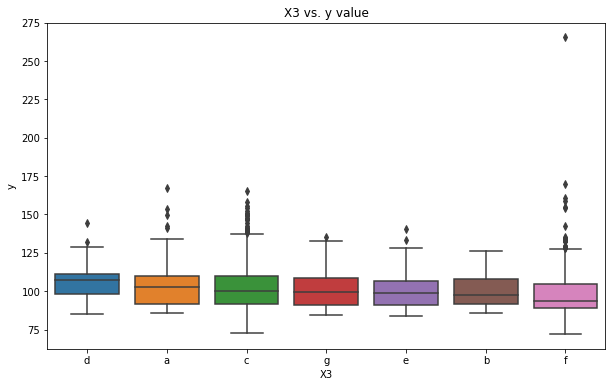

In [27]:
sort_y = train.groupby('X3')['y']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize = (10, 6))
sns.boxplot(y='y', x='X3', data=train, order = sort_y)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels())
plt.title('X3 vs. y value')
plt.show();

#### Feature X4

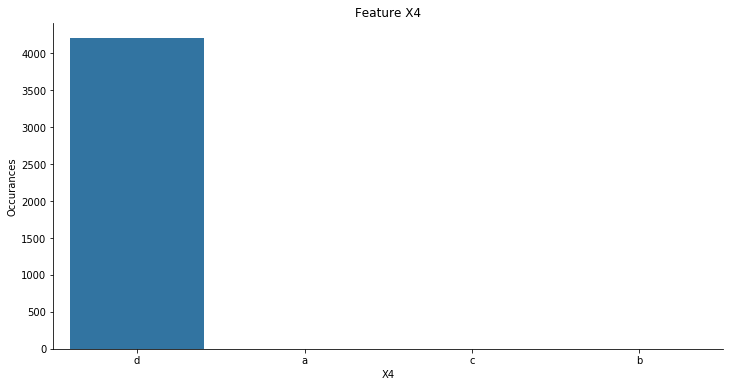

In [28]:
sort_X4 = train.groupby('X4').size()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize=(12,6))
sns.countplot(x='X4', data=train, order = sort_X4)
plt.xlabel('X4')
plt.ylabel('Occurances')
plt.title('Feature X4')
sns.despine();

#### X4 vs. target feature y

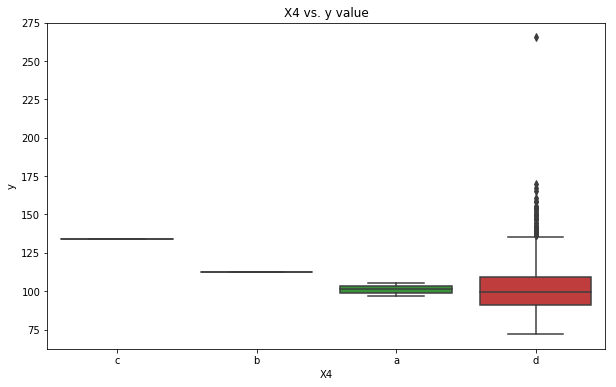

In [29]:
sort_y = train.groupby('X4')['y']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize = (10, 6))
sns.boxplot(y='y', x='X4', data=train, order = sort_y)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels())
plt.title('X4 vs. y value')
plt.show();

#### Feature X5

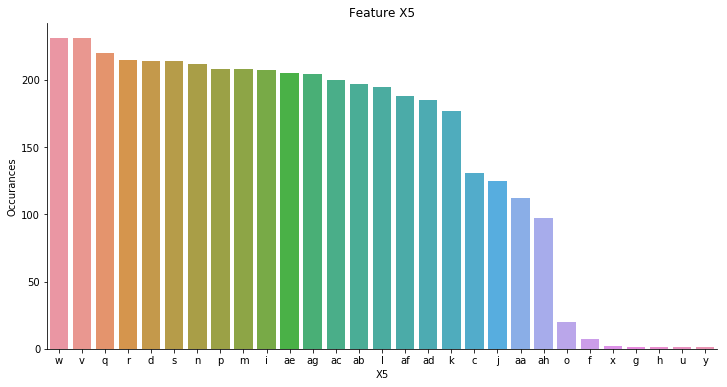

In [30]:
sort_X5 = train.groupby('X5').size()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize=(12,6))
sns.countplot(x='X5', data=train, order = sort_X5)
plt.xlabel('X5')
plt.ylabel('Occurances')
plt.title('Feature X5')
sns.despine();

#### X5 vs. target feature y

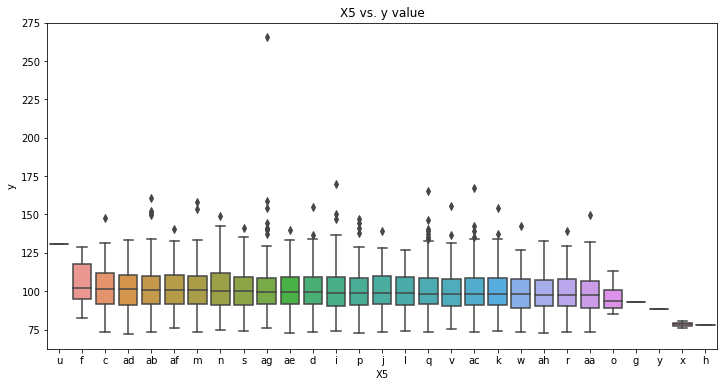

In [31]:
sort_y = train.groupby('X5')['y']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize = (12, 6))
sns.boxplot(y='y', x='X5', data=train, order=sort_y)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels())
plt.title('X5 vs. y value')
plt.show();

#### Feature X6

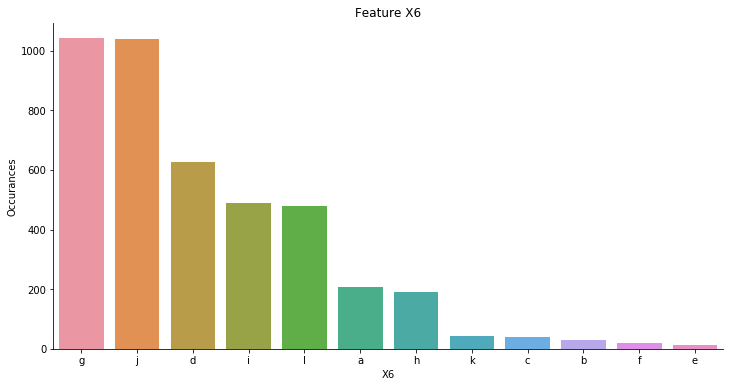

In [32]:
sort_X6 = train.groupby('X6').size()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize=(12,6))
sns.countplot(x='X6', data=train, order = sort_X6)
plt.xlabel('X6')
plt.ylabel('Occurances')
plt.title('Feature X6')
sns.despine();

#### X6 vs. target feature y

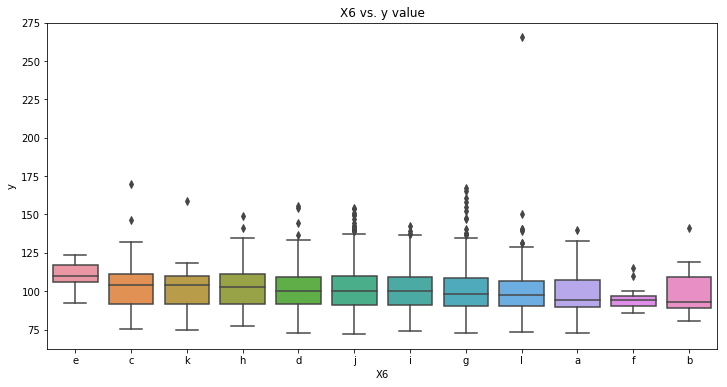

In [33]:
sort_y = train.groupby('X6')['y']\
                     .median()\
                     .sort_values(ascending=False)\
                     .index
plt.figure(figsize = (12, 6))
sns.boxplot(y='y', x='X6', data=train, order=sort_y)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels())
plt.title('X6 vs. y value')
plt.show();

#### Feature X8

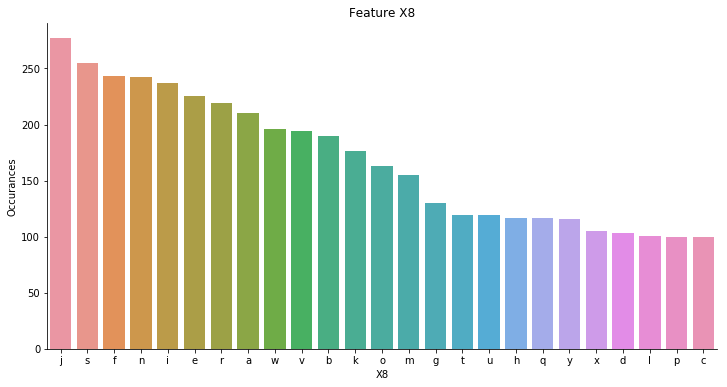

In [34]:
sort_X8 = train.groupby('X8').size()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize=(12,6))
sns.countplot(x='X8', data=train, order = sort_X8)
plt.xlabel('X8')
plt.ylabel('Occurances')
plt.title('Feature X8')
sns.despine();

#### X8 vs. target feature y

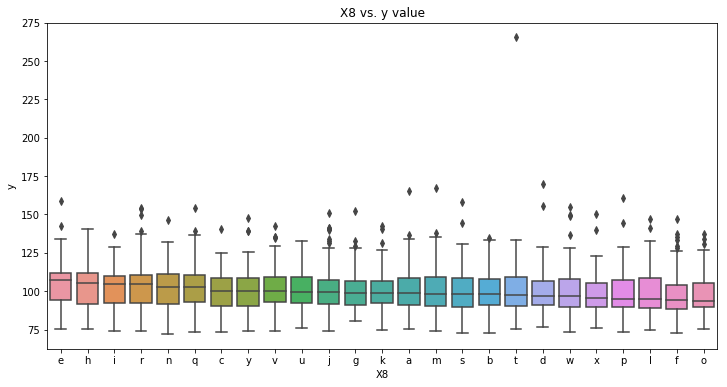

In [35]:
sort_y = train.groupby('X8')['y']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize = (12, 6))
sns.boxplot(y='y', x='X8', data=train, order=sort_y)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels())
plt.title('X8 vs. y value')
plt.show();

Some categorical features have effects on the "y" and the "X0" seems have the highest effect.

For the categorical features, we encode the levels as digits using Scikit-learn's MultiLabelBinarizer and treat them as new features.

In [7]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

X0_trans = mlb.fit_transform([{str(val)} for val in train['X0'].values])
X1_trans = mlb.fit_transform([{str(val)} for val in train['X1'].values])
X2_trans = mlb.fit_transform([{str(val)} for val in train['X2'].values])
X3_trans = mlb.fit_transform([{str(val)} for val in train['X3'].values])
X4_trans = mlb.fit_transform([{str(val)} for val in train['X4'].values])
X5_trans = mlb.fit_transform([{str(val)} for val in train['X5'].values])
X6_trans = mlb.fit_transform([{str(val)} for val in train['X6'].values])
X8_trans = mlb.fit_transform([{str(val)} for val in train['X8'].values])

In [8]:
X8_trans

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

Then we drop the constant features and categorical features which have been MultiLabelBinarized earlier, as well as our target feature "y".

In [9]:
train_new = train.drop(['y','X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], axis=1)

We then add the encoded features to form the final dataset to be used with TPOT.

In [11]:
train_new = np.hstack((train_new.values, X0_trans, X1_trans, X2_trans, X3_trans, X4_trans, X5_trans, X6_trans, X8_trans))

In [12]:
train_new.shape

(4209, 552)

In [13]:
np.isnan(train_new).any()

False

In [14]:
train_new[0].size

552

### TPOT

In [15]:
train_class = train['y'].values

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_new, train_class,
                                                    train_size=0.75, test_size=0.25)

In [17]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)

HBox(children=(IntProgress(value=0, description='Optimization Progress', max=120), HTML(value='')))

Generation 1 - Current best internal CV score: -75.24530750732399
Generation 2 - Current best internal CV score: -74.90881962449828
Generation 3 - Current best internal CV score: -74.90881962449828
Generation 4 - Current best internal CV score: -74.90881962449828
Generation 5 - Current best internal CV score: -74.90881962449828

Best pipeline: RandomForestRegressor(KNeighborsRegressor(input_matrix, n_neighbors=47, p=1, weights=uniform), bootstrap=True, max_features=0.25, min_samples_leaf=16, min_samples_split=4, n_estimators=100)


TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=5,
       max_eval_time_mins=5, max_time_mins=None, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=20,
       random_state=None, scoring=None, subsample=1.0, use_dask=False,
       verbosity=2, warm_start=False)

In [18]:
print("TPOT cross-validation MSE")
print(tpot.score(X_test, y_test))

TPOT cross-validation MSE
-55.9489985239


In [19]:
from sklearn.metrics import mean_squared_error
print('MSE:')
print(mean_squared_error(y_test, tpot.predict(X_test)))

MSE:
55.9489985239


In [20]:
print('RMSE:')
print(np.sqrt(mean_squared_error(y_test, tpot.predict(X_test))))

RMSE:
7.47990631786


In [21]:
tpot.export('tpot_Mercedes_testing_time_pipeline.py')

True